In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [352]:
train_dataset=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [353]:
categorical=['Name','Sex','Ticket','Cabin','Embarked']

In [354]:
X = train_dataset.iloc[:,[2,4,5]].values
Y = train_dataset.iloc[:,[1]].values

In [355]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=1)


In [356]:
print(train_dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [357]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X_train=ct.fit_transform(X_train)
X_test=ct.fit_transform(X_test)

In [358]:
survived = train_dataset[train_dataset['Survived']==1]['Sex'].value_counts()
dead = train_dataset[train_dataset['Survived']==0]['Sex'].value_counts()

In [359]:
print(survived)

female    233
male      109
Name: Sex, dtype: int64


In [360]:
print(X_train)

[[0.0 1.0 3 nan]
 [1.0 0.0 1 30.0]
 [1.0 0.0 2 34.0]
 ...
 [0.0 1.0 2 21.0]
 [1.0 0.0 3 nan]
 [0.0 1.0 3 21.0]]


In [361]:
print(X_test)


[[1.0 0.0 1 48.0]
 [0.0 1.0 3 nan]
 [1.0 0.0 2 17.0]
 [1.0 0.0 3 nan]
 [1.0 0.0 2 7.0]
 [0.0 1.0 3 21.0]
 [0.0 1.0 2 36.5]
 [1.0 0.0 1 35.0]
 [0.0 1.0 1 28.0]
 [1.0 0.0 3 nan]
 [0.0 1.0 3 25.0]
 [1.0 0.0 3 26.0]
 [0.0 1.0 1 54.0]
 [0.0 1.0 2 nan]
 [1.0 0.0 3 nan]
 [0.0 1.0 1 28.0]
 [0.0 1.0 3 10.0]
 [0.0 1.0 3 24.0]
 [0.0 1.0 3 36.0]
 [1.0 0.0 2 24.0]
 [0.0 1.0 3 32.0]
 [0.0 1.0 3 26.0]
 [1.0 0.0 1 24.0]
 [0.0 1.0 2 18.0]
 [1.0 0.0 3 14.5]
 [0.0 1.0 3 27.0]
 [1.0 0.0 1 21.0]
 [1.0 0.0 2 42.0]
 [0.0 1.0 2 26.0]
 [1.0 0.0 1 22.0]
 [1.0 0.0 3 22.0]
 [0.0 1.0 1 nan]
 [1.0 0.0 3 39.0]
 [1.0 0.0 3 25.0]
 [0.0 1.0 3 40.5]
 [1.0 0.0 3 5.0]
 [0.0 1.0 1 36.0]
 [0.0 1.0 3 nan]
 [0.0 1.0 1 25.0]
 [0.0 1.0 3 20.0]
 [1.0 0.0 3 27.0]
 [1.0 0.0 3 27.0]
 [1.0 0.0 1 47.0]
 [0.0 1.0 1 45.5]
 [0.0 1.0 2 1.0]
 [0.0 1.0 3 35.0]
 [0.0 1.0 3 11.0]
 [0.0 1.0 2 39.0]
 [0.0 1.0 1 35.0]
 [0.0 1.0 2 16.0]
 [0.0 1.0 2 nan]
 [1.0 0.0 2 21.0]
 [0.0 1.0 2 19.0]
 [0.0 1.0 2 36.0]
 [0.0 1.0 3 29.0]
 [1.0 0.0 3 24.0]
 [0

In [362]:
train_dataset['Age'].fillna(train_dataset['Age'].median(), inplace = True)
test_data["Age"].fillna(test_data['Age'].median(), inplace=True)


In [363]:
numerical=["Age","Fare"]
for i in numerical:
  count_num=d=train_dataset[i].describe()
  print(count_num)

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [364]:
Pclass_count=train_dataset['Pclass'].count()
Pclass_unique=train_dataset['Pclass'].nunique()
Pclass_top=train_dataset['Pclass'].value_counts().idxmax()
Pclass_freq=train_dataset[train_dataset['Pclass']==3].count()


In [365]:
for i in range(len(categorical)):  
  Pclass1=d=train_dataset[categorical[i]].describe(include=['0'])
  print(Pclass1,"\n")

count                         891
unique                        891
top       Chapman, Mr. John Henry
freq                            1
Name: Name, dtype: object 

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object 

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object 

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object 

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object 



In [366]:
survived_class = train_dataset[train_dataset['Survived']==1]['Pclass'].value_counts()
dead_class = train_dataset[train_dataset['Survived']==0]['Pclass'].value_counts()

In [367]:
print(dead_class)

3    372
2     97
1     80
Name: Pclass, dtype: int64


In [368]:
corr=survived_class.corr(train_dataset["Pclass"]==1)

In [369]:
corr

0.9398294967903258

In [370]:
survived_sex = train_dataset[train_dataset['Survived']==1]['Sex'].value_counts()
dead_sex = train_dataset[train_dataset['Survived']==0]['Sex'].value_counts()

In [371]:
survived_sex

female    233
male      109
Name: Sex, dtype: int64

In [372]:
survived_age = train_dataset[train_dataset['Survived']==1]['Age'].value_counts()
dead_age = train_dataset[train_dataset['Survived']==0]['Age'].value_counts()

In [373]:
survived_age

28.00    59
24.00    15
36.00    11
35.00    11
27.00    11
         ..
80.00     1
7.00      1
32.50     1
12.00     1
0.67      1
Name: Age, Length: 65, dtype: int64

In [374]:
train_dataset['Age_bin'] = pd.cut(train_dataset['Age'], bins=[0,4,25,80,100], labels=['Infants','Teenage','Adult','oldest'])

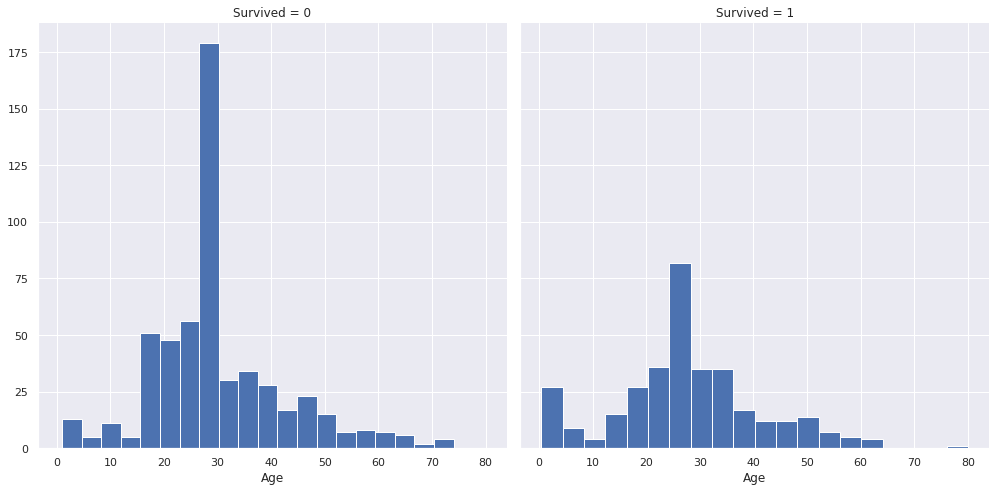

In [396]:
g = sns.FacetGrid(train_dataset, col='Survived', height=7)
g.map(plt.hist, 'Age', bins=20)

In [376]:
train_dataset['Age_bin']

0      Teenage
1        Adult
2        Adult
3        Adult
4        Adult
        ...   
886      Adult
887    Teenage
888      Adult
889      Adult
890      Adult
Name: Age_bin, Length: 891, dtype: category
Categories (4, object): ['Infants' < 'Teenage' < 'Adult' < 'oldest']

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


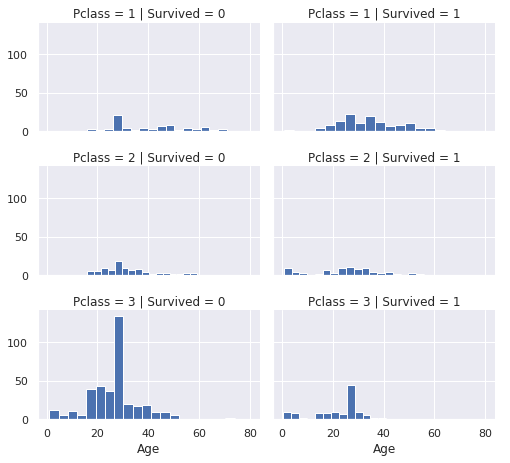

In [377]:
grid = sns.FacetGrid(train_dataset, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend();

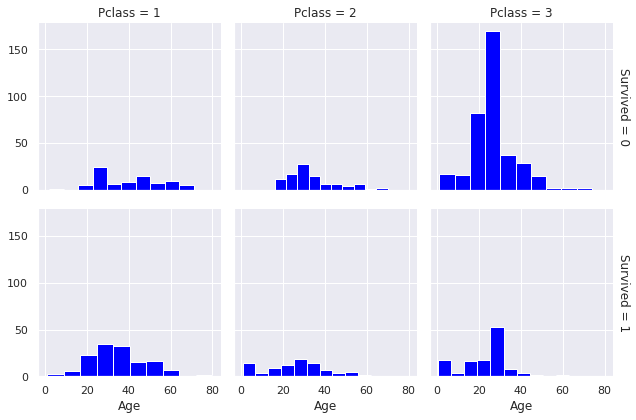

In [378]:
import seaborn as sns
g = sns.FacetGrid(train_dataset, col="Pclass", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="blue");

In [379]:
train_dataset['Fare'].fillna(train_dataset['Fare'].median(), inplace = True)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


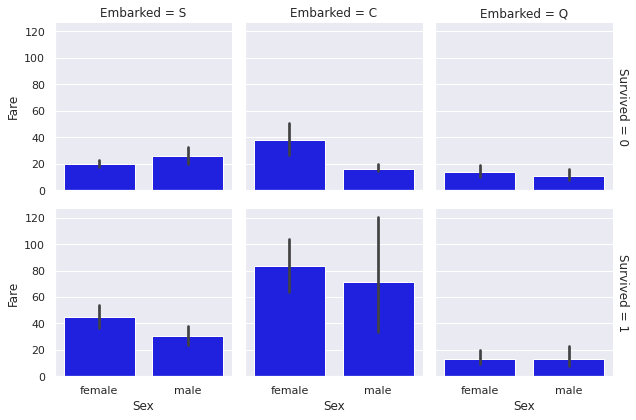

In [380]:
g1 = sns.FacetGrid(train_dataset, col="Embarked", row="Survived", margin_titles=True)
g1.map(sns.barplot, "Sex", "Fare", color="blue")

In [381]:
tickets=train_dataset["Ticket"].nunique()
n=train_dataset["Ticket"].count()
duplicated=100-(((tickets/n)*100))
duplicated

23.56902356902357

In [382]:
train_dataset.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.064910
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [383]:
train_dataset["Cabin"].isna().sum()

687

In [384]:
test_data["Cabin"].isna().sum()

327

In [385]:
train_dataset = pd.get_dummies(train_dataset, columns = ["Sex"],prefix=["Sex"]) 

In [386]:
train_dataset

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Teenage,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Adult,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Adult,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,Adult,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,Teenage,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,NaN,S,Adult,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,Adult,0,1


In [387]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3)
train_dataset["Age"]=train_dataset["Age"].values.reshape(-1,1)
imputer.fit_transform(train_dataset["Age"].values.reshape(-1,1))

array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [28.  ],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [28.  ],
       [31.  ],
       [28.  ],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [28.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [40.  ],
       [28.  ],
       [28.  ],
       [66.  ],
       [28.  ],
       [42.  ],
       [28.  ],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [28.  ],
       [ 3.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [28.  ],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

In [388]:
most_freq=train_dataset["Embarked"].value_counts()

In [389]:
train_dataset["Embarked"].fillna('S')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [390]:
train_dataset['Fare'].fillna(train_dataset['Fare'].dropna().median(), inplace=True)

In [391]:
train_dataset["Fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [392]:
r = [0, 7.91, 14.454, 31.0, 512.329]
g = [0,1,2,3]
train_dataset["Fare"] = pd.cut(train_dataset["Fare"], bins=r, labels=g)

In [393]:
train_dataset["Fare"]

0      0
1      3
2      1
3      3
4      1
      ..
886    1
887    2
888    2
889    2
890    0
Name: Fare, Length: 891, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]